In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import ipython_genutils as ip
import sklearn as sk
import zipfile
import os

#1 Data Exploration (9 points)

1. Load the dataset and display the first 10 rows. How many features does the dataset contain?


In [ ]:
df = pd.read_csv('/content/hotelbooking.csv')
print(df.head(10))
#17 features

  Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   
5   INN00006                 1                   0                         0   
6   INN00007                 1                   1                         1   
7   INN00008                 3                   0                         1   
8   INN00009                 1                   1                         0   
9   INN00010                 2                   0                         0   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1       

2. Provide a statistical summary for the numerical features of the dataset. Which feature has
the highest mean?

In [ ]:
summary = df.describe()
print(summary)
highest_mean_feature = summary.loc['mean'].idxmax()
print(highest_mean_feature)

       number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min                 0.0000

3. Check the dataset for any missing values. Are there any missing values across the dataset? If
yes, list the columns with missing values and their counts.

In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]
#there are no missing values


,0


4. Plot histograms for three numerical features (‘number of adults’, ‘average price’, ‘lead time’)
to examine their distribution.

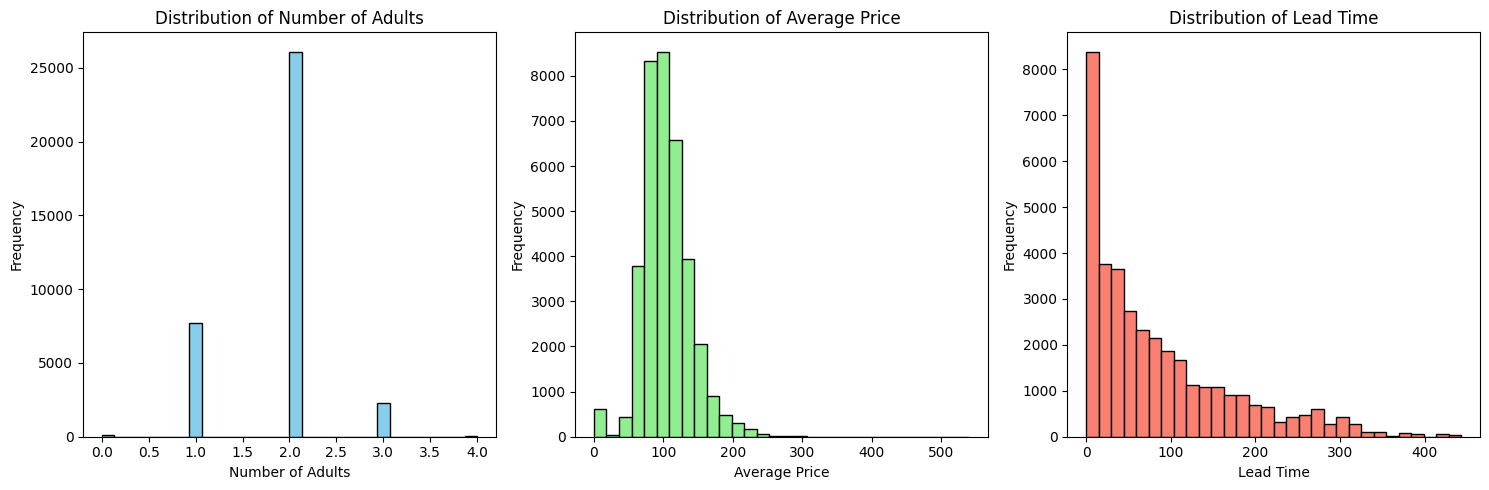

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['number of adults'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Adults')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['average price'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['lead time'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#the number of adults seems fairly evenly distributed
#the average price seems be more frequent at cheaper prices and most frequent when near 100
#lead time seems like the usual decreasing function distribution except for the notably frequent 0 lead time


5. Use boxplots to examine whether there are outliers in the ‘average price’ feature. Explain
your observations.

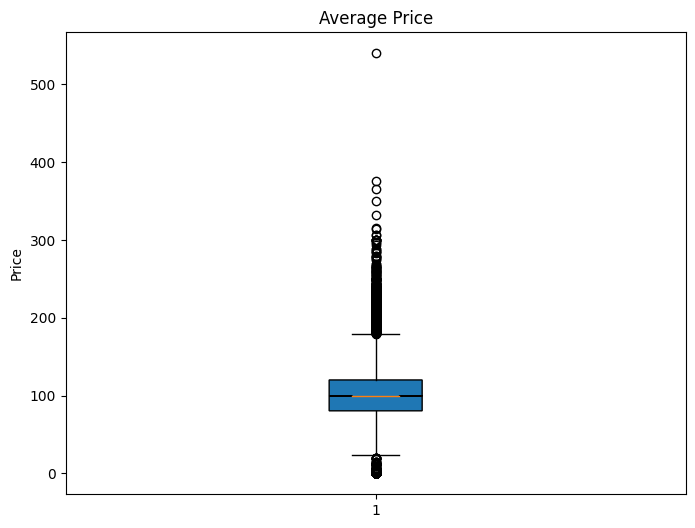

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['average price'], notch=True, vert=True, patch_artist=True)
plt.title('Average Price')
plt.ylabel('Price')
plt.show()

# there appears to be an outlier at a price point above 500, but there doesnt seem to be any others with that degree of variance.

6. Compute the correlation matrix and create a heatmap with ‘seaborn’ 3 for numerical features.

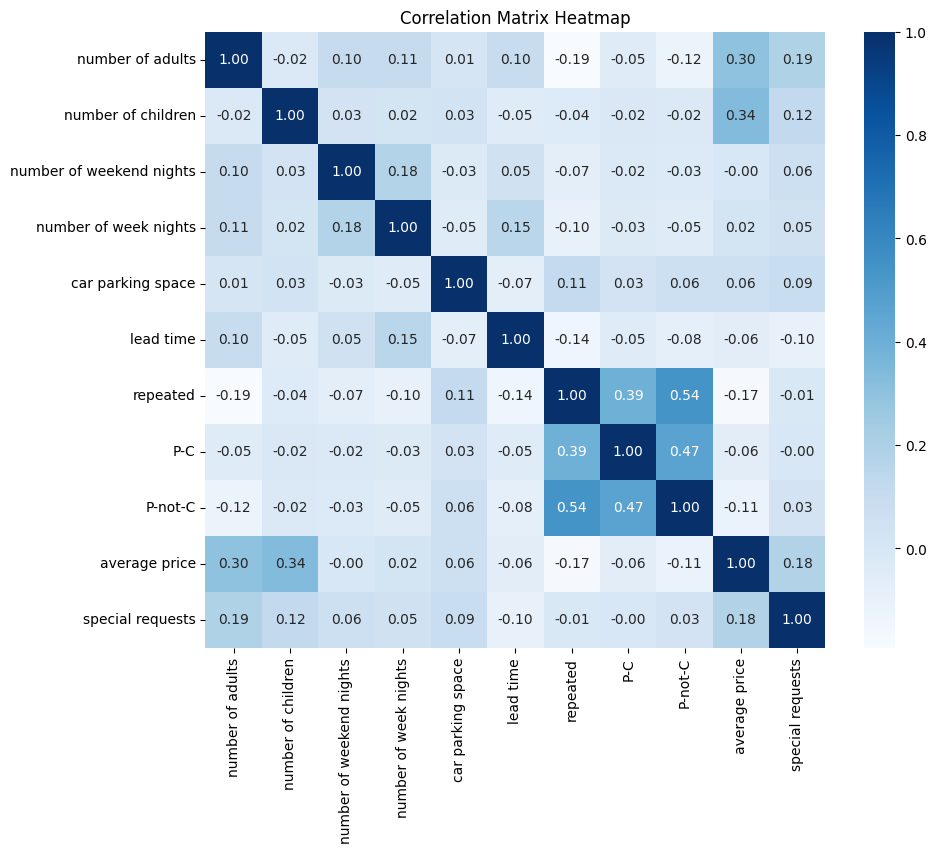

In [ ]:
import seaborn as sns

correlation_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


7. Create a new feature ‘total nights’ as the sum of ‘number of weekend nights’ and ‘number of
week nights’. Show the first 5 rows of your merging result.

In [ ]:
df['total nights'] = df['number of weekend nights'] + df['number of week nights']

df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,total nights
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled,7
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled,4
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled,4
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled,2
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled,3


#2 Decision Tree (6 points)

1. Train a Decision Tree classifier on the ‘booking status’ using features ‘number of adults’,
‘average price’, ‘total nights’ (continuous features), as well as ‘type of meal’ and ‘room type’
(categorical features). Convert the categorical features into numerical format using one-hot
encoding. Split the data into an 80-20 train-test set Split the data into 80-20 train-test sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df[['number of adults', 'average price', 'total nights', 'type of meal', 'room type']]
y = df['booking status']

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['type of meal', 'room type']])
X_encoded_df = pd.DataFrame(X_encoded.toarray(), index=X.index, columns=encoder.get_feature_names_out(['type of meal', 'room type']))  # Ensure the index is aligned with X

X_final = pd.concat([X[['number of adults', 'average price', 'total nights']].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

y_pred = tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7341876808598594

2. Evaluate the Decision Tree model using accuracy and display the confusion matrix.

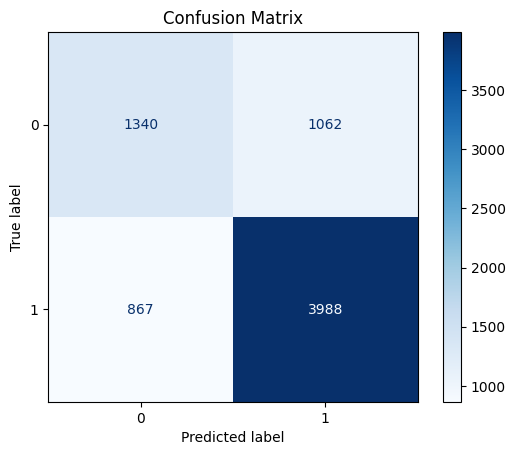

Accuracy of the Decision Tree model: 73.42%


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_matrix_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy of the Decision Tree model: {:.2f}%".format(accuracy * 100))

3. Determine which feature is the most important for making predictions. Display the importance of each feature.

In [ ]:
feature_importances = tree_classifier.feature_importances_

feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
1,average price,0.662501
2,total nights,0.183973
0,number of adults,0.057531
7,room type_Room_Type 1,0.025459
10,room type_Room_Type 4,0.016227
3,type of meal_Meal Plan 1,0.014149
6,type of meal_Not Selected,0.013835
4,type of meal_Meal Plan 2,0.011631
8,room type_Room_Type 2,0.005729
11,room type_Room_Type 5,0.004516
